In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

display(df.head())
display(df.info())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

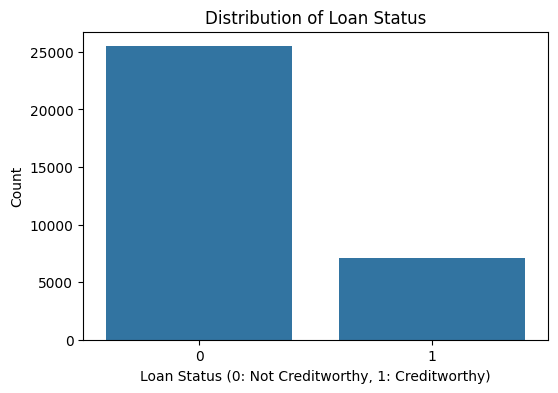

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable ('loan_status')
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Not Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.show()

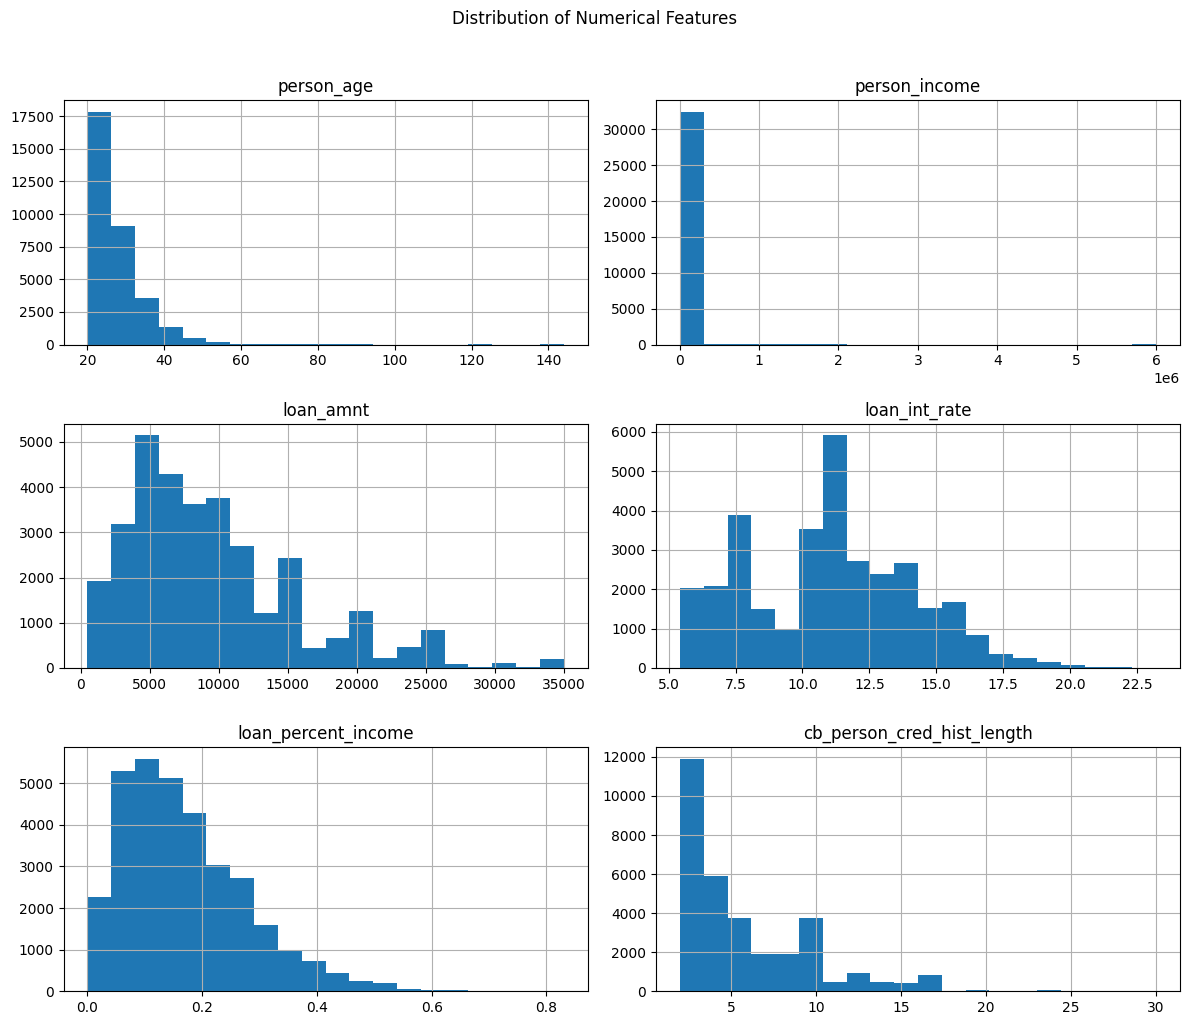

In [ ]:
# Visualize the distribution of some numerical features
numerical_cols_to_plot = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
df[numerical_cols_to_plot].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

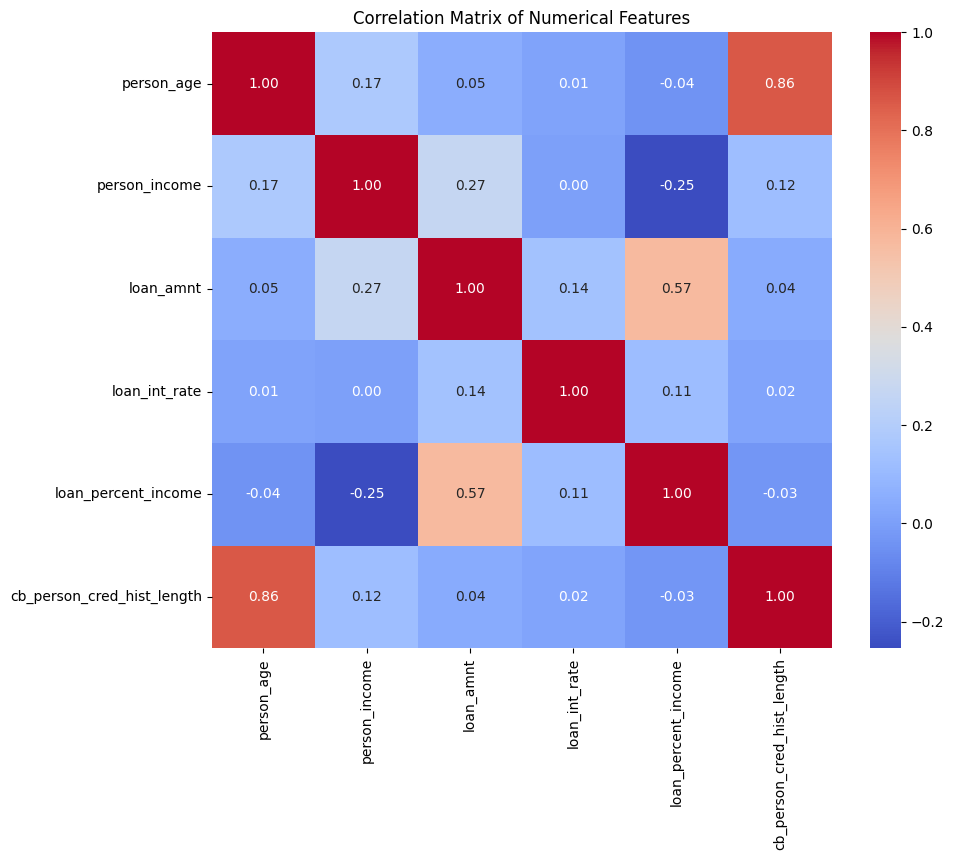

In [ ]:

# Visualize the correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Handle missing values by imputing with the median
for col in ['person_emp_length', 'loan_int_rate']:
    df[col] = df[col].fillna(df[col].median())

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply one-hot encoding to categorical columns
df_categorical_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Separate target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Update numerical columns after dropping the target
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X.index)

# Concatenate scaled numerical features and one-hot encoded categorical features
X_processed = pd.concat([X_numerical_scaled, df_categorical_encoded], axis=1)

display(X_processed.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-0.903374,-0.114143,28.926614,4.019404,1.625921,3.931411,-0.691554,False,False,True,...,False,True,False,False,False,True,False,False,False,True
1,-1.060904,-0.911147,0.056763,-1.358650,0.042310,-0.657458,-0.938167,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,3.744110,-0.691554,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.745843,-0.009274,-0.187897,4.019404,1.369558,3.369508,-0.938167,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,-0.588313,-0.188358,0.790742,4.019404,1.058028,3.556809,-0.444942,False,False,True,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
import numpy as np

# 1. Calculate debt-to-income ratio
X_processed['debt_to_income_ratio'] = X_processed['loan_amnt'] / X_processed['person_income']

# Handle potential division by zero (infinite values)
max_debt_to_income = X_processed.replace([np.inf, -np.inf], np.nan)['debt_to_income_ratio'].max()
X_processed['debt_to_income_ratio'] = X_processed['debt_to_income_ratio'].replace([np.inf, -np.inf], max_debt_to_income if pd.notnull(max_debt_to_income) else 0)
X_processed['debt_to_income_ratio'] = X_processed['debt_to_income_ratio'].fillna(0) # Fill NaN created by division by zero if no max exists

# 2. Create a feature for long credit history (threshold 10 years)
X_processed['long_credit_history'] = X_processed['cb_person_cred_hist_length'] > 10

# 3. Create age to employment length ratio
X_processed['age_to_employment_ratio'] = X_processed['person_age'] / X_processed['person_emp_length']

# Handle potential division by zero or by zero (infinite values)
max_age_to_employment = X_processed.replace([np.inf, -np.inf], np.nan)['age_to_employment_ratio'].max()
X_processed['age_to_employment_ratio'] = X_processed['age_to_employment_ratio'].replace([np.inf, -np.inf], max_age_to_employment if pd.notnull(max_age_to_employment) else 0)
X_processed['age_to_employment_ratio'] = X_processed['age_to_employment_ratio'].fillna(0) # Fill NaN created by division by zero if no max exists


# 4. Display the first few rows of the updated DataFrame
display(X_processed.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,debt_to_income_ratio,long_credit_history,age_to_employment_ratio
0,-0.903374,-0.114143,28.926614,4.019404,1.625921,3.931411,-0.691554,False,False,True,...,False,False,True,False,False,False,True,-35.213667,False,-0.031230
1,-1.060904,-0.911147,0.056763,-1.358650,0.042310,-0.657458,-0.938167,False,True,False,...,True,False,False,False,False,False,False,1.491143,False,-18.690190
2,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,3.744110,-0.691554,False,False,False,...,False,True,False,False,False,False,False,0.709928,False,0.467289
3,-0.745843,-0.009274,-0.187897,4.019404,1.369558,3.369508,-0.938167,False,False,True,...,False,True,False,False,False,False,False,-433.386139,False,3.969424
4,-0.588313,-0.188358,0.790742,4.019404,1.058028,3.556809,-0.444942,False,False,True,...,False,True,False,False,False,False,True,-21.339151,False,-0.744001


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26064, 25)
Shape of X_test: (6517, 25)
Shape of y_train: (26064,)
Shape of y_test: (6517,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"{name} Performance:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)

    # Generate and print the classification report
    classification_rep = classification_report(y_test, y_pred, target_names=['Not Creditworthy', 'Creditworthy'])
    print(f"{name} Classification Report:\n")
    print(classification_rep)
    print("=" * 30)

Training Logistic Regression...
Logistic Regression Performance:
  Precision: 0.7684
  Recall: 0.5488
  F1-Score: 0.6403
  ROC-AUC: 0.8685
------------------------------
Logistic Regression Classification Report:

                  precision    recall  f1-score   support

Not Creditworthy       0.88      0.95      0.92      5072
    Creditworthy       0.77      0.55      0.64      1445

        accuracy                           0.86      6517
       macro avg       0.82      0.75      0.78      6517
    weighted avg       0.86      0.86      0.85      6517

Training Decision Tree...
Decision Tree Performance:
  Precision: 0.7508
  Recall: 0.7758
  F1-Score: 0.7631
  ROC-AUC: 0.8512
------------------------------
Decision Tree Classification Report:

                  precision    recall  f1-score   support

Not Creditworthy       0.94      0.93      0.93      5072
    Creditworthy       0.75      0.78      0.76      1445

        accuracy                           0.89      6517
     

In [ ]:
best_model = models["Random Forest"]
print("Best performing model selected: Random Forest")

Best performing model selected: Random Forest


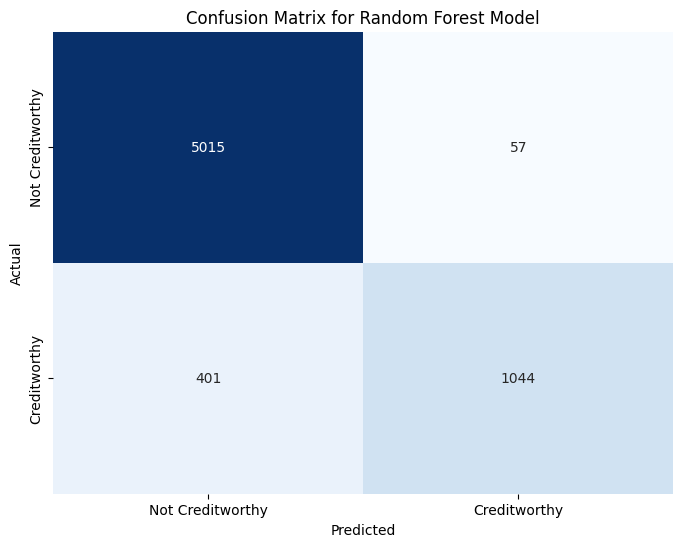

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix for the Random Forest model
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Creditworthy', 'Creditworthy'],
            yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# Use the best model to make predictions on the test features
y_pred = best_model.predict(X_test)

# Use the best model to predict the probability of creditworthiness
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print the first few predictions and probabilities
print("First few predictions (y_pred):")
print(y_pred[:10])

print("\nFirst few predicted probabilities (y_proba):")
print(y_proba[:10])

First few predictions (y_pred):
[0 0 0 1 1 0 0 0 0 0]

First few predicted probabilities (y_proba):
[0.04 0.22 0.24 0.98 0.86 0.1  0.01 0.   0.04 0.03]


## Summary:

### Data Analysis Key Findings

* Missing values in 'person\_emp\_length' and 'loan\_int\_rate' were imputed with the median.
* Categorical features were successfully one-hot encoded, and numerical features were scaled using `StandardScaler`.
* Three new features were engineered: 'debt\_to\_income\_ratio', 'long\_credit\_history' (binary indicating credit history > 10 years), and 'age\_to\_employment\_ratio'. Potential division by zero or by zero was handled for the ratio features.
* The data was split into training and testing sets with an 80/20 ratio.
* Three classification models (Logistic Regression, Decision Tree, and Random Forest) were trained and evaluated.
* The models achieved the following accuracies on the test set:
    *   Logistic Regression: 0.86
    *   Decision Tree: 0.89
    *   Random Forest: 0.93
* The Random Forest model achieved the highest performance across multiple metrics, including Precision (0.9482), F1-Score (0.8201), and ROC-AUC (0.9371).
* The Decision Tree model showed the highest Recall (0.7758).
* The Random Forest model was selected as the best-performing model based on the evaluation metrics, particularly ROC-AUC and overall accuracy.
* The best model (Random Forest) was used to predict creditworthiness and the probability of creditworthiness on the test set.

### Insights or Next Steps

* The Random Forest model appears to be the most suitable for this credit scoring task based on its strong overall performance. Further hyperparameter tuning could potentially improve its performance.
* Investigating the feature importance from the Random Forest model could provide insights into which features are most influential in predicting creditworthiness.